In [1]:
from netCDF4 import Dataset as NetCDFFile # extract the nc4 file to get geography data
import matplotlib.pyplot as plt
import numpy as np
import os
#search for specific base file: find `conda info --base` -name epsg
os.environ["PROJ_LIB"] ='/opt/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj/'
from mpl_toolkits.basemap import Basemap #ploting the US map; install by `conda install -c anaconda basemap`

In [2]:
geography_file = NetCDFFile("GRACEDADM_CLSM0125US_7D.A20020401.030.nc4")

In [3]:
lat = geography_file.variables['lat'][:]
lon = geography_file.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
time = geography_file.variables['time'][:]
gws_inst = geography_file.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = geography_file.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = geography_file.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile

In [4]:
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

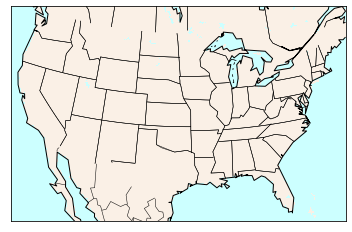

In [5]:
map.drawcoastlines()
map.drawstates()
#map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
#map.drawcounties() # you can even add counties (and other shapefiles!)

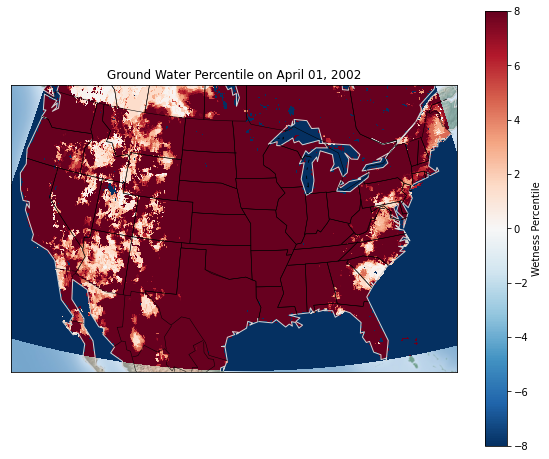

In [6]:
fig = plt.figure(figsize=(10, 8))

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.shadedrelief(scale=0.5)
#map.pcolormesh(lon, lat, rtzsm_inst, latlon=True, cmap='RdBu_r')
map.pcolormesh(lon, lat, gws_inst.data[0], latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
map.drawcoastlines(color='lightgray')
map.drawstates()
map.drawcountries()
plt.title('Ground Water Percentile on April 01, 2002')
plt.colorbar(label='Wetness Percentile')

In [7]:
#lons,lats= np.meshgrid(lon-180,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
#x,y = map(lons,lats)

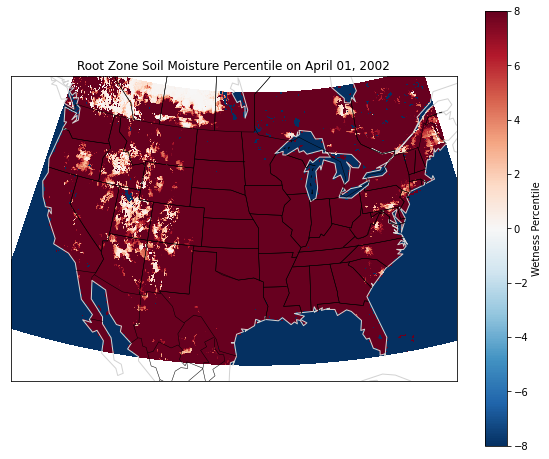

In [8]:
fig = plt.figure(figsize=(10, 8))

map = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
#map.shadedrelief(scale=0.5)
#map.pcolormesh(lon, lat, rtzsm_inst, latlon=True, cmap='RdBu_r')
map.pcolormesh(lon, lat, rtzsm_inst.data[0], latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
map.drawcoastlines(color='lightgray')
map.drawstates()
map.drawcountries()
plt.title('Root Zone Soil Moisture Percentile on April 01, 2002')
plt.colorbar(label='Wetness Percentile')

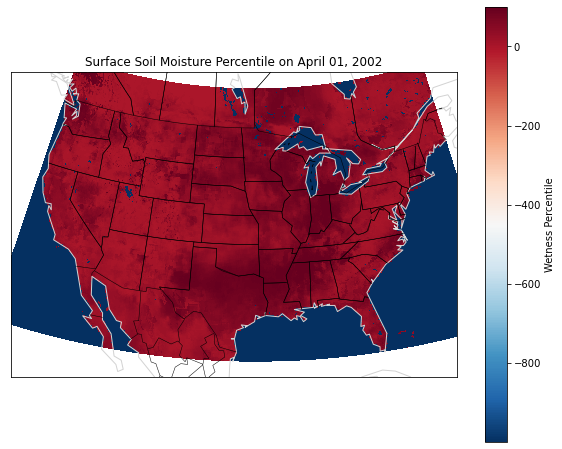

In [9]:

fig = plt.figure(figsize=(10, 8))

map = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
#map.shadedrelief(scale=0.5)
#map.pcolormesh(lon, lat, rtzsm_inst, latlon=True, cmap='RdBu_r')
map.pcolormesh(lon, lat, sfsm_inst.data[0], latlon=True, cmap='RdBu_r')
#plt.clim(-8, 8)
map.drawcoastlines(color='lightgray')
map.drawstates()
map.drawcountries()
plt.title('Surface Soil Moisture Percentile on April 01, 2002')
plt.colorbar(label='Wetness Percentile')

In [10]:
#3d plots on base map
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.animation as animation

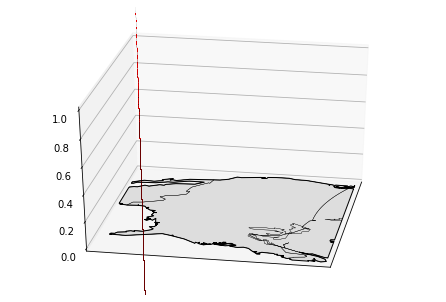

In [11]:
fig = plt.figure()
ax = Axes3D(fig)

#ax.set_axis_off()
#ax.azim = 270
ax.dist = 7

#base map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95, fix_aspect=False)
#map.shadedrelief(scale=0.5)

polys = []
for polygon in map.landpolygons:
    polys.append(polygon.get_coords())


lc = PolyCollection(polys, edgecolor='black',
                    facecolor='#DDDDDD', closed=False)

#ax.set_aspect('equal')
ax.add_collection3d(lc)
ax.add_collection3d(map.drawcoastlines(linewidth=0.25))
ax.add_collection3d(map.drawcountries(linewidth=0.35))
ax.view_init(azim = 10, elev = 30)

ax.bar3d(np.ravel(lon),np.ravel(lat), np.zeros(len(np.ravel(lon))),2,2,np.ravel(gws_inst.data[0]), color = 'red', alpha = 0.8)
#plt.show()

def rotate(angle):
    ax.view_init(azim=angle)
#rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)

In [12]:
lon.shape

(224, 464)

In [13]:
np.vstack(map(np.ravel, gws_inst.data[0]))

TypeError: input must be a scalar

In [ ]:
np.vstack(np.ravel(gws_inst.data[0]))